In [8]:
import os 
import sys 
import time 
import numpy as np
import json
import tpch_training as tp 

In [41]:
training_fnames = ['./training_results/'+x for x in os.listdir('./training_results') if 'json' in x and 'test_clear_ports' in x]
len(training_fnames)
print(training_fnames)

def get_spark_params(result_dict):
    param_vals = []
    for param in tp.SPARK_PARAMETERS:
        for p in result_dict['params']:
            if p['name'] == param['name']:
                param_vals.append(p['cur_value'])
    return tuple(param_vals)

['./training_results/sf10_main_test_clear_ports_deterministic_56.json', './training_results/sf10_main_test_clear_ports_deterministic_57.json', './training_results/sf10_main_test_clear_ports_deterministic_58.json', './training_results/sf10_main_test_clear_ports_deterministic_59.json']


In [42]:
defaults = tuple(a['default_value'] for a in tp.SPARK_PARAMETERS)
defaults

(1,
 '1g',
 2,
 1,
 '1g',
 '48m',
 'true',
 'true',
 '32k',
 '4m',
 'true',
 0.6,
 '128',
 'false',
 'lz4',
 1,
 200,
 200,
 0.5,
 4040)

In [43]:
fname_numdata = {}

deterministic_data = {}

for fname in training_fnames:
    with open(fname,'r+') as file:
        try:
            file_data = json.load(file)
        except:
            continue
        fname_numdata[fname] = len(file_data)
        if 'deterministic' in fname:
            deterministic_data[fname] = file_data
print(sum(fname_numdata.values()))
fname_numdata

315


{'./training_results/sf10_main_test_clear_ports_deterministic_56.json': 105,
 './training_results/sf10_main_test_clear_ports_deterministic_57.json': 105,
 './training_results/sf10_main_test_clear_ports_deterministic_58.json': 105}

In [44]:
det_params = {}
det_rt = {}
for fname, data in deterministic_data.items():
    det_params[fname] = []
    det_rt[fname] = []
    for result_dict in data.values():
        det_params[fname].append(get_spark_params(result_dict))
        if result_dict['runtimes']:
            det_rt[fname].append(result_dict['runtimes']['total'])
prev_fname = fname
for fname in det_params:
    assert det_params[fname][0] == defaults, f'{det_params[fname][0]} !=\n{defaults}'
    assert str(det_params[fname]) == str(det_params[prev_fname]), fname + " " + prev_fname
    print(fname[18:60], '\n',det_rt[fname][0][0], det_rt[fname][0][-1], max(det_rt[fname][0]), min(det_rt[fname][0]))

/sf10_main_test_clear_ports_deterministic_ 
 1.9228999614715576 0.17715024948120117 1.9228999614715576 0.17715024948120117
/sf10_main_test_clear_ports_deterministic_ 
 1.878791332244873 0.14616799354553223 1.878791332244873 0.12883830070495605
/sf10_main_test_clear_ports_deterministic_ 
 1.306466817855835 0.16339898109436035 1.306466817855835 0.13869833946228027


In [45]:
# how many different param combos have we tried?
fname_num_params = {}
fname_valid = {}
for fname in training_fnames:
    with open(fname,'r+') as file:
        try:
            file_data = json.load(file)
        except:
            continue
        fname_num_params[fname] = set()
        fname_valid[fname] = 0
        for result_dict in file_data.values():
            fname_num_params[fname].add(get_spark_params(result_dict))
            fname_valid[fname] += 1 if result_dict['runtimes'] else 0


In [46]:
print(sum([len(x) for x in fname_num_params.values()]))
for fname, vals in fname_num_params.items():
    print(fname[18:60], '\nnum unique params', len(vals), 'total runs',fname_numdata[fname] , 'valid runs', fname_valid[fname])

315
/sf10_main_test_clear_ports_deterministic_ 
num unique params 105 total runs 105 valid runs 104
/sf10_main_test_clear_ports_deterministic_ 
num unique params 105 total runs 105 valid runs 104
/sf10_main_test_clear_ports_deterministic_ 
num unique params 105 total runs 105 valid runs 104


In [47]:
#det_rt

In [48]:
for fname in det_rt:
    all_runs = []
    for run in det_rt[fname]:
        all_runs += run
        print('avg ', round(np.average(run), 5), 'median', round(np.median(run), 5), 'range ', round(max(run)-min(run),5), 'std ', round(np.std(run), 5))
    print('overall runs avg ', round(np.average(all_runs), 5), 'median', round(np.median(all_runs), 5), 'range ', round(max(all_runs)-min(all_runs),5), 'std ', round(np.std(all_runs), 5))
              
        

avg  0.24132 median 0.19602 range  1.74575 std  0.18745
avg  0.1885 median 0.18307 range  0.06316 std  0.01353
avg  0.18752 median 0.18199 range  0.0631 std  0.01319
avg  0.17748 median 0.17248 range  0.11766 std  0.01469
avg  0.17631 median 0.16934 range  0.07826 std  0.01534
avg  0.17626 median 0.1707 range  0.05238 std  0.01221
avg  0.17575 median 0.16872 range  0.07968 std  0.01517
avg  0.1724 median 0.16853 range  0.05401 std  0.00927
avg  0.17644 median 0.16954 range  0.06967 std  0.01403
avg  0.17364 median 0.16805 range  0.07603 std  0.01241
avg  0.17407 median 0.16836 range  0.07105 std  0.01335
avg  0.17273 median 0.16771 range  0.07215 std  0.0123
avg  0.17332 median 0.16799 range  0.04936 std  0.01102
avg  0.17023 median 0.16789 range  0.02797 std  0.00635
avg  0.17308 median 0.16818 range  0.03003 std  0.00986
avg  0.17019 median 0.16757 range  0.02631 std  0.00619
avg  0.17338 median 0.16783 range  0.08584 std  0.01288
avg  0.17165 median 0.16786 range  0.05129 std  0.009

['../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_raw_runtimes_42.json', '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_raw_runtimes_41.json', '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_raw_runtimes_40.json', '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_raw_runtimes_39.json', '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_raw_runtimes_43.json']
../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_raw_runtimes_42.json 105
last [(0.2098407745361328, 'total'), (0.020621776580810547, '8'), (0.01619434356689453, '2'), (0.015401363372802734, '7'), (0.013265132904052734, '21'), (0.012515068054199219, '5'), (0.011658906936645

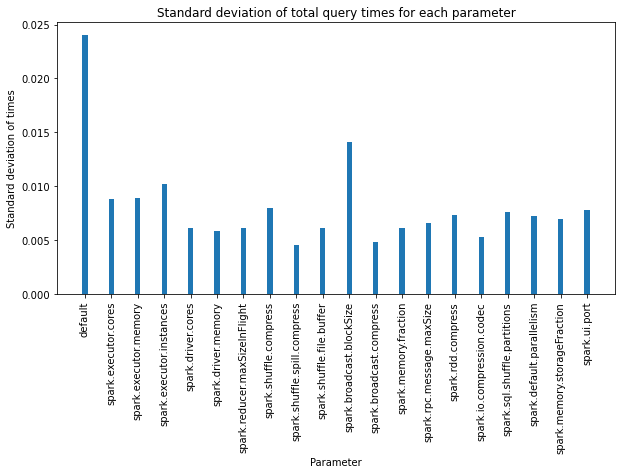

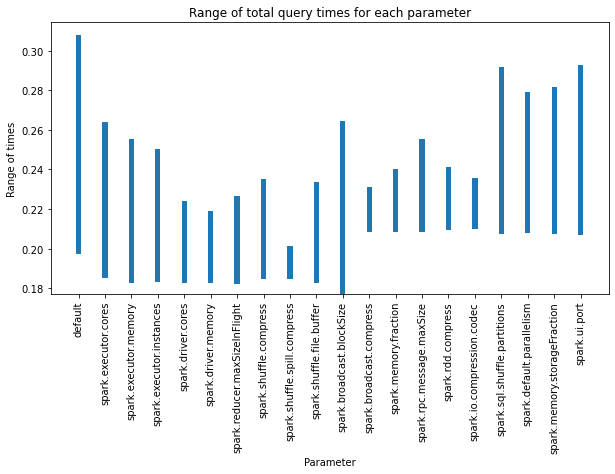

../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_raw_runtimes_40.json 105
last [(0.20739984512329102, 'total'), (0.042925119400024414, '8'), (0.012371540069580078, '21'), (0.011270284652709961, '7'), (0.010733842849731445, '20'), (0.010463714599609375, '2'), (0.010041475296020508, '15'), (0.009732723236083984, '11'), (0.008631229400634766, '22'), (0.008397579193115234, '9'), (0.008246183395385742, '5'), (0.007512092590332031, '18'), (0.007445096969604492, '10'), (0.007020711898803711, '17'), (0.006967782974243164, '19'), (0.006596803665161133, '14'), (0.006417751312255859, '12'), (0.006247997283935547, '13'), (0.00620269775390625, '1'), (0.0057408809661865234, '3'), (0.005712985992431641, '16'), (0.005444765090942383, '4'), (0.0032765865325927734, '6')]
(0.030242204666137695, '6') (0.3422093391418457, '8') 1.938610553741455
first [(0.3422093391418457, '8'), (0.29947996139526367, '1'), (0.19962501525878906, '2'), (0.12955498695

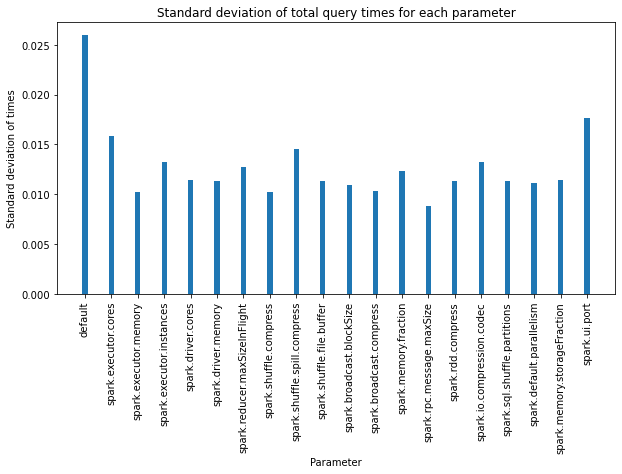

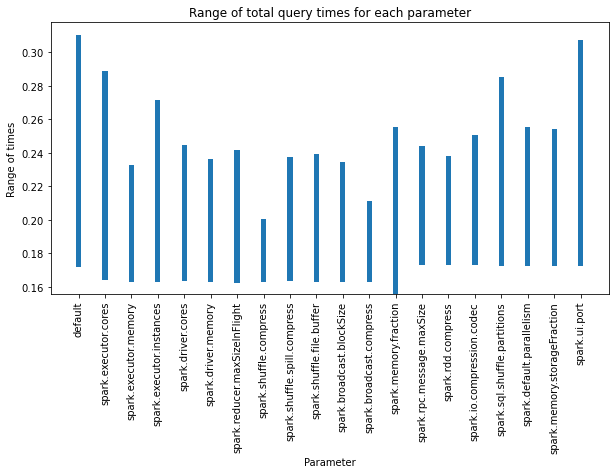

../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_raw_runtimes_39.json 105
last [(0.21262264251708984, 'total'), (0.020853757858276367, '8'), (0.014900684356689453, '2'), (0.014806747436523438, '7'), (0.013686418533325195, '21'), (0.011468887329101562, '5'), (0.011195898056030273, '11'), (0.011123180389404297, '15'), (0.010992765426635742, '9'), (0.010896444320678711, '20'), (0.00929117202758789, '10'), (0.008658170700073242, '18'), (0.00834798812866211, '22'), (0.00811910629272461, '19'), (0.008044242858886719, '17'), (0.007990121841430664, '1'), (0.007822990417480469, '3'), (0.0073626041412353516, '14'), (0.006655693054199219, '12'), (0.006367683410644531, '16'), (0.0059664249420166016, '4'), (0.004597902297973633, '13'), (0.0034737586975097656, '6')]
(0.02891254425048828, '6') (0.3367125988006592, '1') 1.819847583770752
first [(0.3367125988006592, '1'), (0.24355721473693848, '8'), (0.23188567161560059, '2'), (0.1308138370513

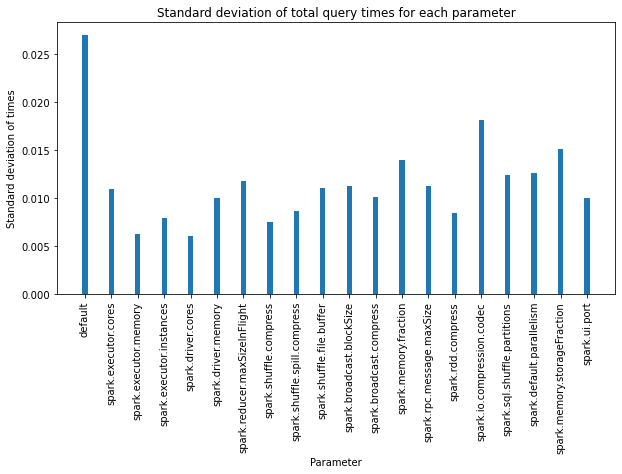

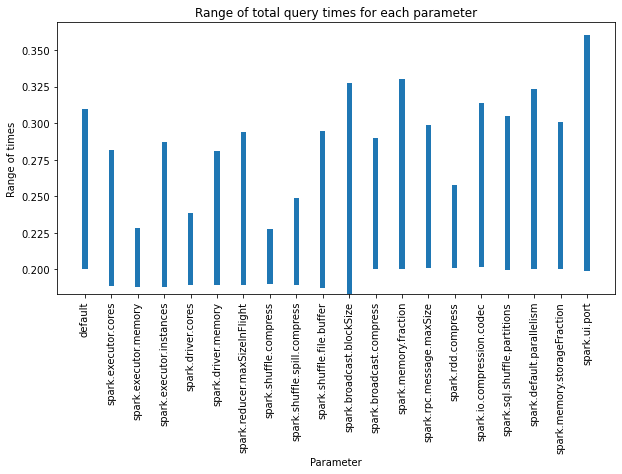

../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_raw_runtimes_43.json 105
last [(0.17528629302978516, 'total'), (0.015175819396972656, '8'), (0.011436700820922852, '21'), (0.01137399673461914, '7'), (0.010643243789672852, '2'), (0.010225296020507812, '20'), (0.009895801544189453, '15'), (0.009848833084106445, '11'), (0.00846409797668457, '22'), (0.008204221725463867, '5'), (0.007962226867675781, '9'), (0.007489919662475586, '18'), (0.0072879791259765625, '10'), (0.00702214241027832, '17'), (0.006903886795043945, '19'), (0.0064849853515625, '1'), (0.006109952926635742, '14'), (0.006002664566040039, '12'), (0.0059223175048828125, '3'), (0.005731821060180664, '16'), (0.005613565444946289, '4'), (0.004071474075317383, '13'), (0.003415346145629883, '6')]
(0.02537846565246582, '6') (0.42728447914123535, '1') 2.3297693729400635
first [(0.42728447914123535, '1'), (0.31940197944641113, '8'), (0.26944541931152344, '2'), (0.1392972469329

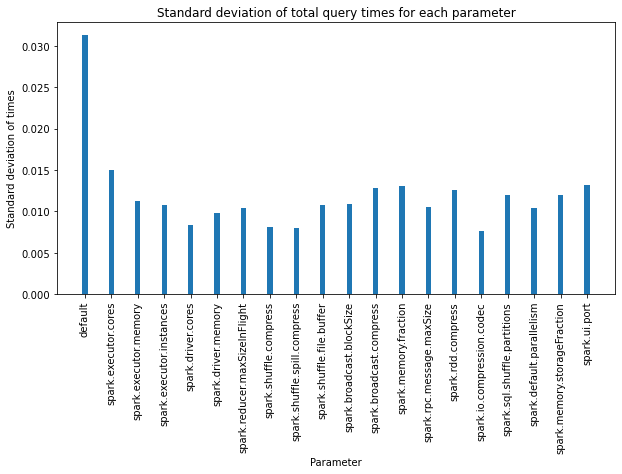

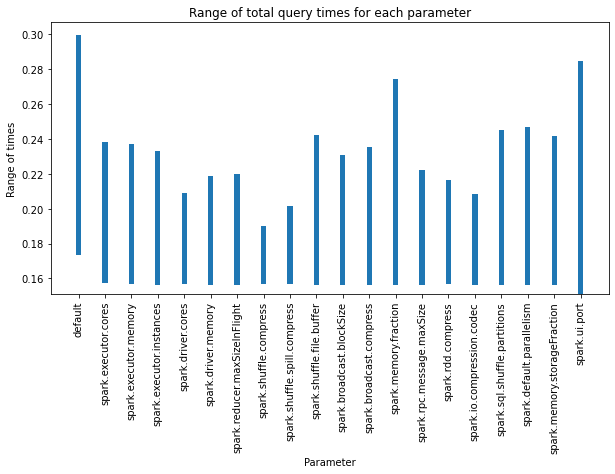

In [72]:
#training_fnames = ['./training_results/'+x for x in os.listdir('./training_results') if 'json' in x and 'test_clear_ports' in x]
direc = '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results'
training_fnames = [f'{direc}/{x}'for x in os.listdir(direc) if 'json' in x and 'nobackup_deterministic_raw_runtimes' in x]

len(training_fnames)
print(training_fnames)
for FNAME in  training_fnames:
    import json
    import os
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    with open(FNAME,'r+') as file:
        try:
            file_data = json.load(file)
        except:
            continue

    class Parameter:
        def __init__(self, name):
            self.name = name
            self.val_to_results = {}

        def add(self, param_val, results):
            self.val_to_results[param_val] = results

        def get_total(self, param_val):
            if param_val in self.val_to_results:
                return self.val_to_results[param_val]["total"]

        def get_param_vals(self):
            return set(self.val_to_results.keys())

    param_name_to_param_obj = {}

    def populate_params():
        #analyze one file

        f = open(FNAME)
        data = json.load(f)
        print(FNAME, len(data))
        for k in data:
            d = data[k]
            params = [p for p in d["params"] if p['spark_param']]
            runtimes = d["runtimes"]
            if len(runtimes) == 0:
                continue

            all_default = True
            for p in params:
                if str(p['cur_value']) != str(p['default_value']):
                    varying_param = p['name']
                    all_default = False
                    break
            if all_default:
                print('last', sorted([(runtimes[k][-1], k) for k in runtimes], reverse=True))
                qt = [(runtimes[k][0], k) for k in runtimes if k != 'total']
                print(min(qt), max(qt), sum([x[0] for x in qt]))
                print('first', sorted(qt, reverse=True))
                # TODO REMOVE
                param_name_to_param_obj["default"] = {'total': runtimes['total'][10:]} 
                # remove first runtime which is always much longer for some reason???
                continue

            if varying_param not in param_name_to_param_obj:
                param_name_to_param_obj[varying_param] = Parameter(varying_param)
            obj = param_name_to_param_obj[varying_param]
            assert "total" in runtimes
            obj.add(p['cur_value'], runtimes)
            
        print(param_name_to_param_obj.keys())

    def analyze_results():
        populate_params()
        default = param_name_to_param_obj["default"]
        default_total = default["total"]
        mins = []
        names = []
        diffs = []
        stds = []
        for p in param_name_to_param_obj:
            min_runtime = float("inf")
            max_runtime = -float("inf")
            times = []
            if p != 'default':
                obj = param_name_to_param_obj[p]
                for k in obj.get_param_vals():
                    total_time = obj.get_total(k)
                    times.extend(total_time)
                    min_runtime = min(min_runtime, min(total_time))
                    max_runtime = max(max_runtime, max(total_time))
                if min_runtime == max_runtime:
                    max_runtime += .001


            else:
                times.extend(default_total)
                min_runtime = min(default_total)
                max_runtime = max(default_total)
            stds.append(np.std(times))
            if p == 'default':
                print(f"{p}, min: {round(min_runtime,5)}, max: {round(max_runtime,5)}, median {round(np.median(times),5)}, avg: {round(np.average(times),5)}  default: {round(min(default_total),5), round(max(default_total),5)}")
            mins.append(min_runtime)
            diffs.append(max_runtime - min_runtime)
            names.append(p)

        #save total time std to csv
        df = pd.DataFrame(list(zip(names, stds)),
        columns =['name', 'standard_dev_total_times'])
        df.to_csv("./training_sensitivity/all_runtime_stds.csv", mode='w')

        #plot std
        fig = plt.figure(figsize = (10, 5))
        plt.xticks(rotation=90)
        plt.bar(names, stds, bottom=[0]*len(names), width=0.2)
        plt.title("Standard deviation of total query times for each parameter")
        plt.xlabel("Parameter")
        plt.ylabel("Standard deviation of times")

        plt.savefig(f"./training_sensitivity/all_runtime_stds{FNAME[-7:-5]}.jpg", bbox_inches="tight")
        plt.show()

        #plot min/max times for each parameter
        fig = plt.figure(figsize = (10, 5))
        plt.xticks(rotation=90)
        plt.bar(names, diffs, bottom=mins, width=0.2)
        plt.title("Range of total query times for each parameter")
        plt.xlabel("Parameter")
        plt.ylabel("Range of times")
        plt.savefig(f"./training_sensitivity/all_runtime_ranges{FNAME[-7:-5]}.jpg", bbox_inches="tight")
        plt.show()

    analyze_results()

In [69]:
direc = '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results'
training_fnames = [f'{direc}/{x}'for x in os.listdir(direc) if 'json' in x and 'and_random' in x]
len(training_fnames)
print(training_fnames)
fname_numdata = {'all':0}

for fname in training_fnames:
    with open(fname,'r+') as file:
        
        try:
            file_data = json.load(file)
            fname_numdata[fname] = len(file_data)
            fname_numdata['all'] += len(file_data)
        except:
            print("error loading", fname)
print(sum(fname_numdata.values()))

# how many different param combos have we tried?
fname_num_params = {'all':set()}
fname_valid = {'all':0}
for fname in training_fnames:
    with open(fname,'r+') as file:
        try:
            file_data = json.load(file)
        except:
            print("error loading", fname)
            continue
        fname_num_params[fname] = set()
        fname_valid[fname] = 0
        for result_dict in file_data.values():
            fname_num_params[fname].add(get_spark_params(result_dict))
            fname_valid[fname] += 1 if result_dict['runtimes'] else 0
            fname_num_params['all'].add(get_spark_params(result_dict))
            fname_valid['all'] += 1 if result_dict['runtimes'] else 0
print(sum([len(x) for x in fname_num_params.values()]))
for fname, vals in fname_num_params.items():
    if fname == 'all':
        print("all:")

    print(fname[100:160], '\nnum unique params', len(vals), 'total runs',fname_numdata[fname] , 'valid runs', fname_valid[fname])

['../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_39.json', '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_40.json', '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_43.json', '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_42.json', '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_41.json']
error loading ../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_41.json
12504
error loading ../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_41.json
12230
all:
 
num unique params 5978 total runs 6252 va